Problem 1 :- (a). Create and print out a scatter plot of this dataset, eruption time versus waiting time. 
1(a)Ans:- The python code to print the scatter plot of the faithful dataset is below. Please run the below code to get the scatter plot and save it.

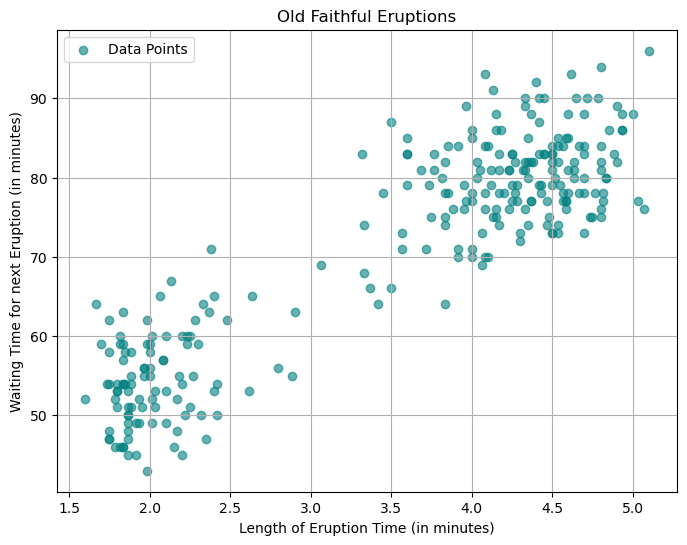

In [1]:
#Problem 1(a) Solution Code
import pandas as pd
import matplotlib.pyplot as plt

filepath = "https://raw.githubusercontent.com/UB01976/is7332025/refs/heads/main/data-mining-project-repo/hw3/faithful.csv"
df = pd.read_csv(filepath)
x = df['eruptions']
y = df['waiting']
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='teal', alpha=0.6, label='Data Points')
plt.title('Old Faithful Eruptions')
plt.xlabel('Length of Eruption Time (in minutes)')
plt.ylabel('Waiting Time for next Eruption (in minutes)')
plt.legend()
plt.grid(True)
plt.savefig("faithful_scatterplot.png", dpi=300)
plt.show()

Problem 1 :- (c). Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset?
1(c)Ans:- The python code to dendrogram of the faithful dataset is below. Please run the below code to get the dendrogram and save it.

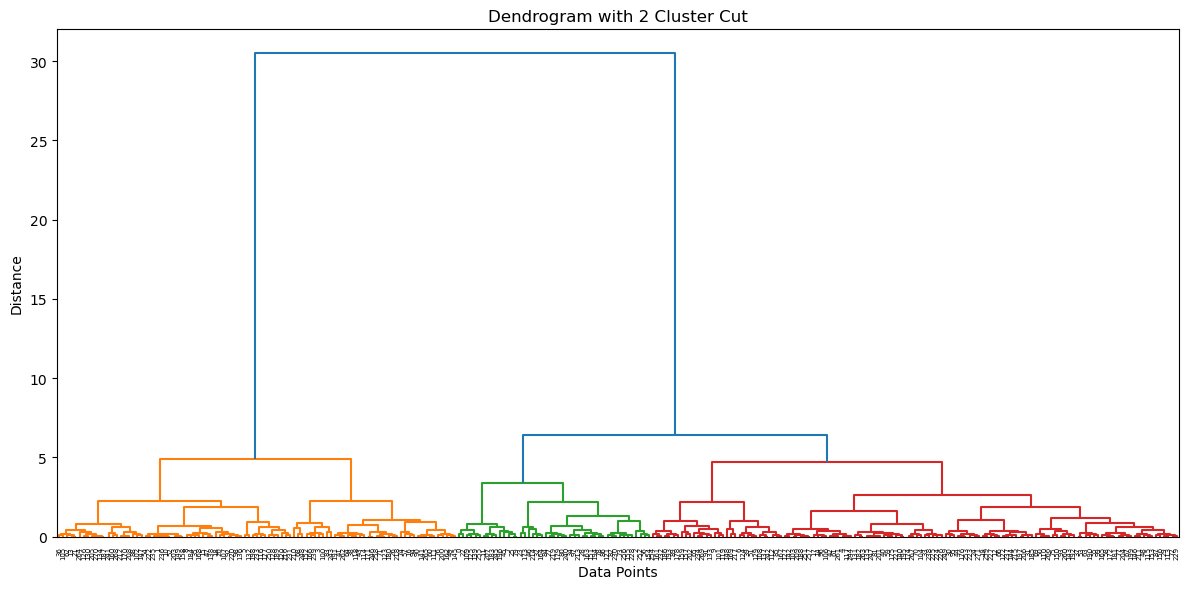

In [9]:
#Problem 1(c) Solution Code
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import seaborn as sns

filepath = "https://raw.githubusercontent.com/UB01976/is7332025/refs/heads/main/data-mining-project-repo/hw3/faithful.csv"
df = pd.read_csv(filepath)

X = df[['eruptions', 'waiting']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False,
           color_threshold=linked[-2, 2])  
plt.title('Dendrogram with 2 Cluster Cut')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig("faithful_dendrogram.png", dpi=300)
plt.show()

Problem 2 :- (a). Implement the k-means algorithm in Python and use it to perform clustering on the Old Faithful dataset. Use the number of clusters that you identified in Problem 1. Your source code for the k-means algorithm. You need to implement the algorithm from scratch.
2(a)Ans:- Please find below the code for k-means algorithm to perform clustering on old faithful dataset with k=2 value identified from Problem 1. Please run the below code to get the output;

In [7]:
#Problem 2(a) Solution Code
import pandas as pd
import numpy as np

filepath = "https://raw.githubusercontent.com/UB01976/is7332025/refs/heads/main/data-mining-project-repo/hw3/faithful.csv"
df = pd.read_csv(filepath)
X = df[['eruptions', 'waiting']].values

k = 2  #Number of Clusters from Problem 1
max_iters = 100
tolerance = 1e-4

np.random.seed(42)
initial_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
centroids = initial_centroids.copy()

for iteration in range(max_iters):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_labels = np.argmin(distances, axis=1)
    new_centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(k)])
    if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tolerance):
        break
    centroids = new_centroids

cluster_summary = [(i, centroids[i][0]) for i in range(k)]
cluster_summary.sort(key=lambda x: x[1])  

cluster_map = {cluster_summary[0][0]: 1, cluster_summary[1][0]: 2}
renumbered_labels = np.vectorize(cluster_map.get)(cluster_labels)

df['cluster'] = renumbered_labels

print(f"\nK-Means converged in {iteration + 1} iterations.\n")

print(f"\nFinal Cluster Centroids:")
for orig_idx, cluster_num in cluster_map.items():
    center = centroids[orig_idx]
    print(f"\nCluster {cluster_num}: Eruption = {center[0]:.2f} mins, Waiting = {center[1]:.2f} mins")
    if cluster_num == 2:
        print("This is Cluster 2 which has Longer Eruption and Waiting Times.\n")
    else:
        print("This is Cluster 1 which has Shorter Eruption and Waiting Times.\n")

unique, counts = np.unique(renumbered_labels, return_counts=True)
print("Points per Cluster:")
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} points")


inertia = sum(np.sum((X[cluster_labels == i] - centroids[i]) ** 2) for i in range(k))
print(f"\nFinal Inertia (Sum of Squared Distances): {inertia:.2f}")

print("\nSample points from each cluster:")
for cluster_num in [1, 2]:
    print(f"\nCluster {cluster_num} examples:")
    print(df[df['cluster'] == cluster_num][['eruptions', 'waiting']].head(5))


K-Means converged in 4 iterations.


Final Cluster Centroids:

Cluster 1: Eruption = 2.09 mins, Waiting = 54.75 mins
This is Cluster 1 which has Shorter Eruption and Waiting Times.


Cluster 2: Eruption = 4.30 mins, Waiting = 80.28 mins
This is Cluster 2 which has Longer Eruption and Waiting Times.

Points per Cluster:
Cluster 1: 100 points
Cluster 2: 172 points

Final Inertia (Sum of Squared Distances): 8901.77

Sample points from each cluster:

Cluster 1 examples:
    eruptions  waiting
1       1.800       54
3       2.283       62
5       2.883       55
8       1.950       51
10      1.833       54

Cluster 2 examples:
   eruptions  waiting
0      3.600       79
2      3.333       74
4      4.533       85
6      4.700       88
7      3.600       85


Problem 2 :- (b). A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot.
2(b)Ans:- Please find below the code for scatter plot of final clustering. Please run the below cell to get the scatter plot;

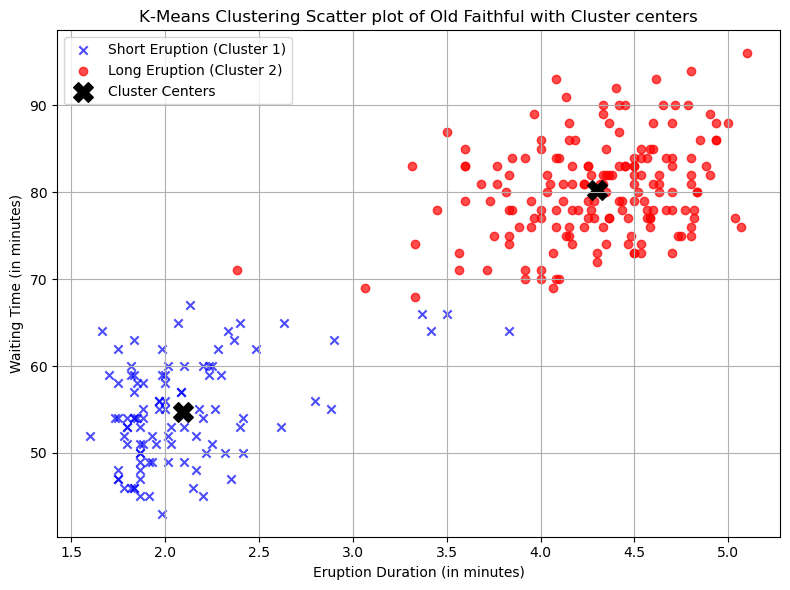

In [5]:
#Problem 2(b) Solution Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = "https://raw.githubusercontent.com/UB01976/is7332025/refs/heads/main/data-mining-project-repo/hw3/faithful.csv"
df = pd.read_csv(filepath)
X = df[['eruptions', 'waiting']].values

k = 2
max_iters = 100
tolerance = 1e-4

np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

for iteration in range(max_iters):
    dists = np.linalg.norm(X[:, None] - centroids, axis=2)
    labels = np.argmin(dists, axis=1)
    new_c = np.array([X[labels==i].mean(axis=0) for i in range(k)])
    if np.all(np.linalg.norm(new_c - centroids, axis=1) < tolerance):
        break
    centroids = new_c

order = sorted(range(k), key=lambda i: centroids[i,0])
map_to = { order[0]: 1, order[1]: 2 }
df['cluster'] = np.vectorize(map_to.get)(labels)

colors = {1:'blue', 2:'red'}
markers = {1:'x', 2:'o'}  
labels = {1:'Short Eruption (Cluster 1)', 2:'Long Eruption (Cluster 2)'}

plt.figure(figsize=(8,6))
for c in [1,2]:
    pts = df[df['cluster']==c]
    plt.scatter(pts['eruptions'], pts['waiting'],
                c=colors[c], marker=markers[c],
                label=labels[c], alpha=0.7)

for orig_idx, new_label in map_to.items():
    c = centroids[orig_idx]
plt.scatter(centroids[:,0], centroids[:,1],
            c='black', marker='X', s=200,
            label='Cluster Centers')

handles, leg_labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(leg_labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('K‑Means Clustering Scatter plot of Old Faithful with Cluster centers')
plt.xlabel('Eruption Duration (in minutes)')
plt.ylabel('Waiting Time (in minutes)')
plt.grid(True)
plt.tight_layout()
plt.savefig("K-Means_Clustering_Final_Scatterplot.png", dpi=300)
plt.show()

Problem 2 :- (c). A plot of the k-means objective function versus iterations of the algorithm. Recall the objective function.
2(c)Ans:- Please find below the plot with k-means objective function versus the iterations using the objective function. Please run the below cell to plot the plot for objective function versus iterations;

K-Means converged in 4 iterations.
Final Objective Function Value: 8901.77


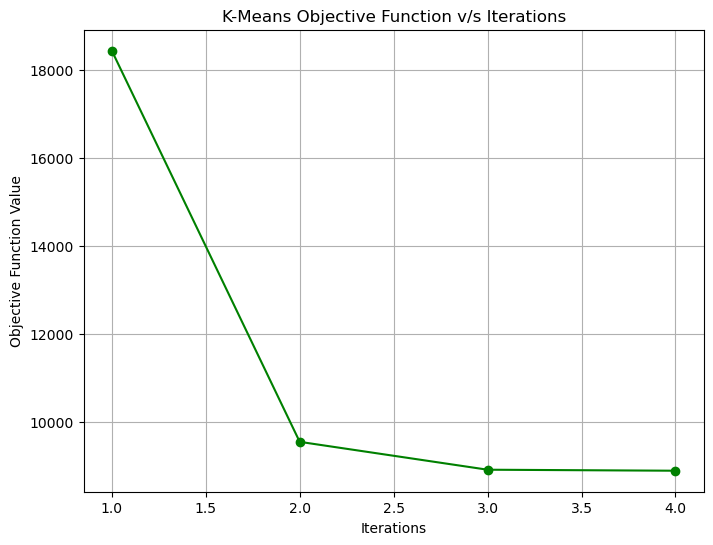

In [3]:
#Problem 2(c) Solution Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

# Load the dataset
filepath = "https://raw.githubusercontent.com/UB01976/is7332025/refs/heads/main/data-mining-project-repo/hw3/faithful.csv"
df = pd.read_csv(filepath)
X = df[['eruptions', 'waiting']].values

def k_means_numpy(X, k, max_iters=100, seed=42):
    np.random.seed(seed)
    centers = X[np.random.choice(len(X), k, replace=False)]
    objective_values = []

    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        distances = np.sum((X - centers[labels])**2, axis=1)
        objective = np.sum(distances)
        objective_values.append(objective)

        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    return centers, labels, objective_values

k = 2
centers, labels, objective_values = k_means_numpy(X, k)

print(f"K-Means converged in {len(objective_values)} iterations.")
print(f"Final Objective Function Value: {objective_values[-1]:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objective_values) + 1), objective_values, color='green',marker='o')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('K-Means Objective Function v/s Iterations')
plt.grid(True)
plt.savefig("K-Means_Objective_versus_Iterations.png", dpi=300)
plt.show() 